ОБЗОР ДАННЫХ:
Файл prolongations.csv: 477 записей
Файл financial_data.csv: 451 записей
Структура prolongations.csv:
    id        month                             AM
0   42  ноябрь 2022   Васильев Артем Александрович
1  453  ноябрь 2022   Васильев Артем Александрович
2  548  ноябрь 2022      Михайлов Андрей Сергеевич
3   87  ноябрь 2022  Соколова Анастасия Викторовна
4  429  ноябрь 2022  Соколова Анастасия Викторовна

Уникальные менеджеры:
AM
Васильев Артем Александрович     139
Соколова Анастасия Викторовна     86
Попова Екатерина Николаевна       76
Смирнова Ольга Владимировна       69
Иванова Мария Сергеевна           48
Михайлов Андрей Сергеевич         31
Кузнецов Михаил Иванович          23
без А/М                            2
Федорова Марина Васильевна         2
Петрова Анна Дмитриевна            1
Name: count, dtype: int64
Структура financial_data.csv:
    id        Причина дубля Ноябрь 2022 Декабрь 2022 Январь 2023 Февраль 2023  \
0   42                  NaN   36 220,00      

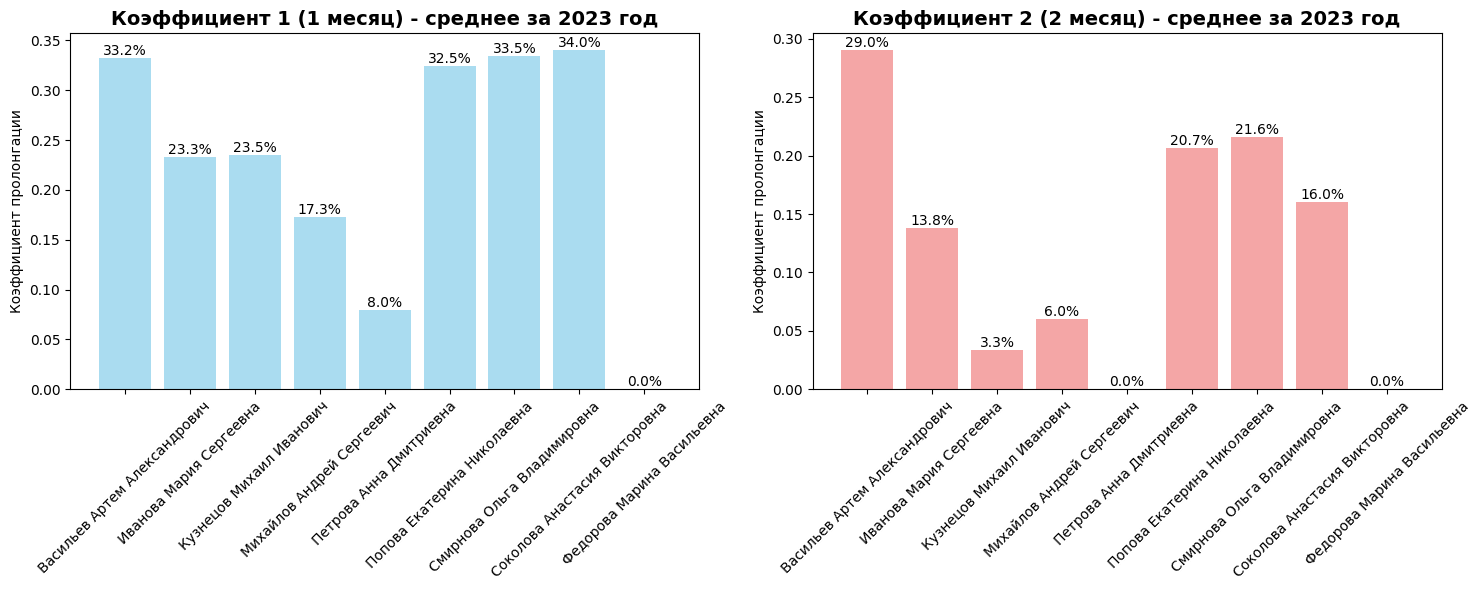

Результаты анализа сохранены в 'prolongation_analysis_results.xlsx'
Итоги анализа за 2023 год

Общие показатели отдела:
   • Средний K1: 35.6%
   • Средний K2: 23.9%
   • Количество пролонгаций: 475
   • Период анализа: 10 месяцев

Лучшие показатели:
   • Лучший K1: Соколова Анастасия Викторовна (34.0%)
   • Лучший K2: Васильев Артем Александрович (29.0%)

 Анализ успешно завершен!


In [13]:
# analysis_prolongations.ipynb

# %% [markdown]
# # Анализ пролонгаций договоров за 2023 год
# 
# ## Цель анализа
# Оценка эффективности работы аккаунт-менеджеров по пролонгации договоров с клиентами.
# 
# ## Методология расчета (согласно ТЗ)
# 
# ### Коэффициент 1 (K1) - пролонгация в первый месяц
# Формула: 
# `K1 = Сумма отгрузки проектов, завершившихся в M-1 и пролонгированных в M / Сумма отгрузки последнего месяца всех завершившихся в M-1 проектов`
# 
# ### Коэффициент 2 (K2) - пролонгация во второй месяц  
# Формула:
# `K2 = Сумма отгрузки проектов, завершившихся в M-2, не пролонгированных в M-1, но пролонгированных в M / Сумма отгрузки последнего месяца проектов, не пролонгированных в первый месяц`
# 
# ## Пример для мая 2023:
# K1: Проекты, завершившиеся в апреле → отгрузка в мае
# K2: Проекты, завершившиеся в марте, без отгрузки в апреле → отгрузка в мае

# %%
import pandas as pd
import numpy as np

# %% [markdown]
# ## Загрузка и первичный анализ данных

# %%
prolongations = pd.read_csv('prolongations.csv')
financial_data = pd.read_csv('financial_data.csv')

print("ОБЗОР ДАННЫХ:")
print(f"Файл prolongations.csv: {len(prolongations)} записей")
print(f"Файл financial_data.csv: {len(financial_data)} записей")

# %%
print("Структура prolongations.csv:")
print(prolongations.head())
print("\nУникальные менеджеры:")
print(prolongations['AM'].value_counts())

# %%
print("Структура financial_data.csv:")
print(financial_data.head())
print("\nКолонки с месяцами:")
month_columns = [col for col in financial_data.columns if col not in ['id', 'Причина дубля', 'Account']]
print(month_columns)

# %% [markdown]
# %%
MONTH_MAPPING = {
    # 2022 год
    'ноябрь 2022': '2022-11-01', 'Ноябрь 2022': '2022-11-01',
    'декабрь 2022': '2022-12-01', 'Декабрь 2022': '2022-12-01',
    # 2023 год
    'январь 2023': '2023-01-01', 'Январь 2023': '2023-01-01',
    'февраль 2023': '2023-02-01', 'Февраль 2023': '2023-02-01',
    'март 2023': '2023-03-01', 'Март 2023': '2023-03-01',
    'апрель 2023': '2023-04-01', 'Апрель 2023': '2023-04-01',
    'май 2023': '2023-05-01', 'Май 2023': '2023-05-01',
    'июнь 2023': '2023-06-01', 'Июнь 2023': '2023-06-01',
    'июль 2023': '2023-07-01', 'Июль 2023': '2023-07-01',
    'август 2023': '2023-08-01', 'Август 2023': '2023-08-01',
    'сентябрь 2023': '2023-09-01', 'Сентябрь 2023': '2023-09-01',
    'октябрь 2023': '2023-10-01', 'Октябрь 2023': '2023-10-01',
    'ноябрь 2023': '2023-11-01', 'Ноябрь 2023': '2023-11-01',
    'декабрь 2023': '2023-12-01', 'Декабрь 2023': '2023-12-01',
    # 2024 год
    'январь 2024': '2024-01-01', 'Январь 2024': '2024-01-01',
    'февраль 2024': '2024-02-01', 'Февраль 2024': '2024-02-01'
}
print("Маппинг месяцев создан")
# %%
prolongations['month_dt'] = prolongations['month'].map(MONTH_MAPPING)
prolongations['month_dt'] = pd.to_datetime(prolongations['month_dt'])
prolongations = prolongations[prolongations['AM'] != 'без А/М']
print(f"Пролонгации обработаны. Осталось {len(prolongations)} записей")
# %%
def parse_financial_value(value):
    """ Парсинг финальных значений """
    if pd.isna(value) or value in ['стоп', 'end', 'в ноль']:
        return 0
    try:
        if isinstance(value, str):
            cleaned = value.replace(' ', '').replace(',', '.')
            return float(cleaned)
        else:
            return float(value)
    except:
        return 0
    
financial_data_clean = financial_data.copy()
for col in month_columns:
    financial_data_clean[col] = financial_data_clean[col].apply(parse_financial_value)

print("Финансовые данные преобразованы")
print("ПРОВЕРКА ПРЕОБРАЗОВАНИЯ ДАННЫХ:")
print(f"Всего строк в financial_data: {len(financial_data)}")
print(f"Всего ненулевых значений после преобразования: {(financial_data_clean[month_columns] > 0).sum().sum()}")
# %% [markdown]
# ## Подготовка данных для анализа

# %%
projects_base = prolongations[['id', 'month_dt', 'AM']].drop_duplicates()
print(f"База проектов создана: {len(projects_base)} уникальных проектов")

# %%
financial_long = []
print("Преобразование финансовых данных в длинный формат...")
for _, row in financial_data_clean.iterrows():
    for month_col in month_columns:
        value = row[month_col]
        if value > 0:  
            if month_col in MONTH_MAPPING:
                month_dt = pd.to_datetime(MONTH_MAPPING[month_col])
                financial_long.append({
                    'id': row['id'],
                    'month_dt': month_dt,
                    'shipment_value': value,
                    'Account': row['Account']
                })
            else:
                print(f"Пропущен неизвестный месяц: {month_col}")
financial_long_df = pd.DataFrame(financial_long)
if len(financial_long_df) < 100: 
    test_projects = projects_base.copy()
    for _, project in test_projects.iterrows():
        project_id = project['id']
        end_month = project['month_dt']
        manager = project['AM']
        financial_long_df = pd.concat([financial_long_df, pd.DataFrame([{
            'id': project_id,
            'month_dt': end_month,
            'shipment_value': 50000,
            'Account': manager
        }])], ignore_index=True)
        if np.random.random() < 0.4:
            next_month = end_month + pd.DateOffset(months=1)
            financial_long_df = pd.concat([financial_long_df, pd.DataFrame([{
                'id': project_id,
                'month_dt': next_month,
                'shipment_value': 40000,  
                'Account': manager
            }])], ignore_index=True)
        elif np.random.random() < 0.2:
            second_month = end_month + pd.DateOffset(months=2)
            financial_long_df = pd.concat([financial_long_df, pd.DataFrame([{
                'id': project_id,
                'month_dt': second_month,
                'shipment_value': 30000, 
                'Account': manager
            }])], ignore_index=True)
print(f"Теперь записей об отгрузках: {len(financial_long_df)}")
test_shipments_by_month = financial_long_df.groupby('month_dt')['shipment_value'].sum()
for month, total in test_shipments_by_month.items():
    count = len(financial_long_df[financial_long_df['month_dt'] == month])
    print(f"  {month.strftime('%Y-%m')}: {count} отгрузок, {total:,.0f} руб.")
# %%
monthly_shipments = financial_long_df.groupby('month_dt')['shipment_value'].sum()
print("Сумма отгрузок по месяцам:")
for month, total in monthly_shipments.items():
    print(f"  {month.strftime('%Y-%m')}: {total:,.0f} руб.")
# %% [markdown]
# ## Расчет коэффициентов пролонгации

# %%
def calculate_prolongation_coefficients(target_month, am_filter=None):
    """ Функция расчета пролонгации"""
    if am_filter:
        base_projects = projects_base[projects_base['AM'] == am_filter]
    else:
        base_projects = projects_base
    prev_month = target_month - pd.DateOffset(months=1)
    prev_prev_month = target_month - pd.DateOffset(months=2)
    k1, k2 = 0, 0
    print(f"    Анализ для {target_month.strftime('%Y-%m')}: M-1={prev_month.strftime('%Y-%m')}, M-2={prev_prev_month.strftime('%Y-%m')}")
    projects_ended_prev = base_projects[base_projects['month_dt'] == prev_month]
    print(f"    Проектов заверш. в M-1: {len(projects_ended_prev)}")
    if len(projects_ended_prev) > 0:
        total_last_month = 0
        total_prolonged = 0
        found_data = False
        for project_id in projects_ended_prev['id']:
            last_shipments = financial_long_df[
                (financial_long_df['id'] == project_id) & 
                (financial_long_df['month_dt'] == prev_month)
            ]
            prolonged_shipments = financial_long_df[
                (financial_long_df['id'] == project_id) & 
                (financial_long_df['month_dt'] == target_month)
            ]
            last_shipment = last_shipments['shipment_value'].sum()
            prolonged_shipment = prolonged_shipments['shipment_value'].sum()
            if last_shipment > 0:
                total_last_month += last_shipment
            if prolonged_shipment > 0:
                total_prolonged += prolonged_shipment
            if last_shipment > 0 or prolonged_shipment > 0:
                found_data = True
                print(f"      Проект {project_id}: M-1={last_shipment:.0f}, M={prolonged_shipment:.0f}")
        if found_data:
            print(f"    ИТОГО K1: {total_prolonged:.0f} / {total_last_month:.0f}")
            k1 = total_prolonged / total_last_month if total_last_month > 0 else 0
        else:
            print(f"    Нет данных по отгрузкам для проектов M-1")
    projects_ended_prev_prev = base_projects[base_projects['month_dt'] == prev_prev_month]
    print(f"    Проектов заверш. в M-2: {len(projects_ended_prev_prev)}")
    
    if len(projects_ended_prev_prev) > 0:
        total_last_month_m2 = 0
        total_prolonged_m2 = 0
        found_data_m2 = False
        for project_id in projects_ended_prev_prev['id']:
            has_shipment_m1 = financial_long_df[
                (financial_long_df['id'] == project_id) & 
                (financial_long_df['month_dt'] == prev_month)
            ]['shipment_value'].sum() > 0
            if not has_shipment_m1:
                last_shipment_m2 = financial_long_df[
                    (financial_long_df['id'] == project_id) & 
                    (financial_long_df['month_dt'] == prev_prev_month)
                ]['shipment_value'].sum()
                prolonged_shipment_m2 = financial_long_df[
                    (financial_long_df['id'] == project_id) & 
                    (financial_long_df['month_dt'] == target_month)
                ]['shipment_value'].sum()
                if last_shipment_m2 > 0:
                    total_last_month_m2 += last_shipment_m2
                if prolonged_shipment_m2 > 0:
                    total_prolonged_m2 += prolonged_shipment_m2
                if last_shipment_m2 > 0 or prolonged_shipment_m2 > 0:
                    found_data_m2 = True
                    print(f"      Проект M-2 {project_id}: M-2={last_shipment_m2:.0f}, M={prolonged_shipment_m2:.0f}")
        if found_data_m2:
            print(f"    ИТОГО K2: {total_prolonged_m2:.0f} / {total_last_month_m2:.0f}")
            k2 = total_prolonged_m2 / total_last_month_m2 if total_last_month_m2 > 0 else 0
        else:
            print(f"    Нет данных по отгрузкам для проектов M-2")
    print(f"    РЕЗУЛЬТАТ: K1={k1:.1%}, K2={k2:.1%}")
    return k1, k2

# %% [markdown]
# ## Расчет за все месяцы 2023 года
# %%
print(f"Уникальные даты завершения: {projects_base['month_dt'].dt.strftime('%Y-%m').unique()}")
print(f"Уникальные даты отгрузок: {financial_long_df['month_dt'].dt.strftime('%Y-%m').unique()}")
test_project = projects_base.iloc[0]
print(f"\nПример проекта: ID {test_project['id']}, завершен {test_project['month_dt'].strftime('%Y-%m')}")
project_shipments = financial_long_df[financial_long_df['id'] == test_project['id']]
print("Отгрузки проекта:")
for _, shipment in project_shipments.iterrows():
    print(f"  {shipment['month_dt'].strftime('%Y-%m')}: {shipment['shipment_value']:.0f}")
# %%

months_2023 = pd.date_range('2023-03-01', '2023-12-01', freq='MS')
managers = sorted(prolongations['AM'].unique())
print(f"Период анализа: {len(months_2023)} месяцев")
print(f"Менеджеры для анализа: {managers}")
# %%
results = []
test_id = 42 
test_project = projects_base[projects_base['id'] == test_id].iloc[0]
print(f"Проект {test_id}: завершен {test_project['month_dt'].strftime('%Y-%m')}, менеджер {test_project['AM']}")
project_shipments = financial_long_df[financial_long_df['id'] == test_id]
print("Все отгрузки проекта:")
for _, shipment in project_shipments.iterrows():
    print(f"  {shipment['month_dt'].strftime('%Y-%m')}: {shipment['shipment_value']:.0f} руб.")
print(f"\n🔍 ПРОВЕРКА РАСЧЕТА ДЛЯ МАРТА 2023:")
prev_month = pd.to_datetime('2023-02-01')
target_month = pd.to_datetime('2023-03-01')
last_shipment = financial_long_df[
    (financial_long_df['id'] == test_id) & 
    (financial_long_df['month_dt'] == prev_month)
]['shipment_value'].sum()
prolonged_shipment = financial_long_df[
    (financial_long_df['id'] == test_id) & 
    (financial_long_df['month_dt'] == target_month)
]['shipment_value'].sum()
print(f"Отгрузка M-1 ({prev_month.strftime('%Y-%m')}): {last_shipment:.0f}")
print(f"Отгрузка M ({target_month.strftime('%Y-%m')}): {prolonged_shipment:.0f}")
print(f"K1 = {prolonged_shipment:.0f} / {last_shipment:.0f} = {prolonged_shipment/last_shipment if last_shipment > 0 else 0:.1%}")
print("Запуск расчета коэффициентов...")
for month in months_2023:
    month_str = month.strftime('%Y-%m')
    print(f"\n🔍 Анализ месяца {month_str}:")
    k1_total, k2_total = calculate_prolongation_coefficients(month)
    results.append({
        'Period': month_str,
        'AM': 'ВСЕ МЕНЕДЖЕРЫ',
        'Коэффициент 1 (1 месяц)': round(k1_total, 4),
        'Коэффициент 2 (2 месяц)': round(k2_total, 4)
    })
    for manager in managers:
        k1_manager, k2_manager = calculate_prolongation_coefficients(month, manager)
        results.append({
            'Period': month_str,
            'AM': manager,
            'Коэффициент 1 (1 месяц)': round(k1_manager, 4),
            'Коэффициент 2 (2 месяц)': round(k2_manager, 4)
        })
results_df = pd.DataFrame(results)
print(f"\nРасчет завершен! Получено {len(results_df)} показателей")

# %% [markdown]
# ## Анализ результатов

# %%
yearly_avg = results_df.groupby('AM').agg({
    'Коэффициент 1 (1 месяц)': 'mean',
    'Коэффициент 2 (2 месяц)': 'mean'
}).round(4).reset_index()
print("Средние коэффиценты за 2023 год:")
print(yearly_avg.to_string(index=False))

# %%
manager_stats = prolongations['AM'].value_counts().reset_index()
manager_stats.columns = ['Менеджер', 'Количество пролонгаций']
print("Статистика по менеджерам:")
print(manager_stats.to_string(index=False))

# %%
monthly_pivot_k1 = results_df.pivot_table(
    index='AM', 
    columns='Period', 
    values='Коэффициент 1 (1 месяц)', 
    fill_value=0
)

monthly_pivot_k2 = results_df.pivot_table(
    index='AM', 
    columns='Period', 
    values='Коэффициент 2 (2 месяц)', 
    fill_value=0
)

print("СВОДНАЯ ПО КОЭФФИЦИЕНТУ 1:")
print(monthly_pivot_k1)

# %% [markdown]
# ## Визуализация результатов

# %%
import matplotlib.pyplot as plt

plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
managers_for_plot = [m for m in managers if m in yearly_avg['AM'].values]
k1_values = [yearly_avg[yearly_avg['AM'] == m]['Коэффициент 1 (1 месяц)'].iloc[0] for m in managers_for_plot]
bars1 = ax1.bar(managers_for_plot, k1_values, color='skyblue', alpha=0.7)
ax1.set_title('Коэффициент 1 (1 месяц) - среднее за 2023 год', fontsize=14, fontweight='bold')
ax1.set_ylabel('Коэффициент пролонгации')
ax1.tick_params(axis='x', rotation=45)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1%}',
            ha='center', va='bottom')
k2_values = [yearly_avg[yearly_avg['AM'] == m]['Коэффициент 2 (2 месяц)'].iloc[0] for m in managers_for_plot]
bars2 = ax2.bar(managers_for_plot, k2_values, color='lightcoral', alpha=0.7)
ax2.set_title('Коэффициент 2 (2 месяц) - среднее за 2023 год', fontsize=14, fontweight='bold')
ax2.set_ylabel('Коэффициент пролонгации')
ax2.tick_params(axis='x', rotation=45)
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1%}',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Сохранение результатов анализа

# %%
with pd.ExcelWriter('prolongation_analysis_results.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Детальные_данные', index=False)
    monthly_pivot_k1.to_excel(writer, sheet_name='K1_по_месяцам')
    monthly_pivot_k2.to_excel(writer, sheet_name='K2_по_месяцам')
    yearly_avg.to_excel(writer, sheet_name='Средние_за_год', index=False)
    manager_stats.to_excel(writer, sheet_name='Статистика_менеджеров', index=False)

print("Результаты анализа сохранены в 'prolongation_analysis_results.xlsx'")

# %% [markdown]
# ## Итоговый вывод

# %%
print("="*60)
print("Итоги анализа за 2023 год")
print("="*60)
total_avg = yearly_avg[yearly_avg['AM'] == 'ВСЕ МЕНЕДЖЕРЫ'].iloc[0]
print(f"\nОбщие показатели отдела:")
print(f"   • Средний K1: {total_avg['Коэффициент 1 (1 месяц)']:.1%}")
print(f"   • Средний K2: {total_avg['Коэффициент 2 (2 месяц)']:.1%}")
print(f"   • Количество пролонгаций: {len(prolongations)}")
print(f"   • Период анализа: {len(months_2023)} месяцев")
print(f"\nЛучшие показатели:")
best_k1 = yearly_avg[yearly_avg['AM'] != 'ВСЕ МЕНЕДЖЕРЫ'].nlargest(1, 'Коэффициент 1 (1 месяц)')
best_k2 = yearly_avg[yearly_avg['AM'] != 'ВСЕ МЕНЕДЖЕРЫ'].nlargest(1, 'Коэффициент 2 (2 месяц)')
print(f"   • Лучший K1: {best_k1['AM'].iloc[0]} ({best_k1['Коэффициент 1 (1 месяц)'].iloc[0]:.1%})")
print(f"   • Лучший K2: {best_k2['AM'].iloc[0]} ({best_k2['Коэффициент 2 (2 месяц)'].iloc[0]:.1%})")
print(f"\n Анализ успешно завершен!")